**PySDS Week 2 Lecture 1.**

In [18]:
from IPython.display import display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Key data structures: 
- Numpy Array
- Series
- DataFrame

## Numpy Array 

The numpy array is the basis of the series and data frame objects. It is very efficient. Unlike a list, the objects in an array are of the same type. This allows for considerably faster computation. Here it is worth pointing out that much of python is actually a wrapper for ```c``` code. C is a pervasive, extremely efficiet language. That said, it is often cumbersome to use and does not provide anywhere near the level of abstraction of python. Numpy uses c more directly than python lists do.  

We tend not to use ethe numpy array directly although it can be useful for a number of tricks, as we will show later. One in particular is for generating multiple columns of random numbers. However, for the most part we only interface numpy through PANDAS and not directly. 

A numpy array is designed to implement matrix algebra, something useful in a variety of circumstances. For example, we can characterise a **social network** as a matrix and then use that matrix to learn things about the network. 

Before we get there, however, let's introduce the simple unidimensional array, sometimes called a **vector**. 

In [3]:
import numpy as np 

x = [1,2,3]

npx = np.array([1,2,3])

print(x,npx)

print(x[0],npx[0])


[1, 2, 3] [1 2 3]
1 1


The numpy array can be unidimensional (i.e. just like a single list) or multidimentional. When it is unidimensional it is sometimes referred to as a vector. This is not quite appropriate according to the mathematicians, but it seems to be popular in computer languages. 

A two dimensional array is referred to as a matrix. So if we have a vector of friendship nominations that means we have a one dimensional array representing friendships from that person to the other people. 

If we have four friends, Alice, Bob, Charlie and Diane, they each have a vector referring to whether they are friends with each other. Let's keep each one of these in order of A,B,C,D. So for Alice, if she is only friends with Diane, her vector would look like: 
```
Alice = np.array([0,0,0,1])
```
Whereas Diane might consider herseff friends with everyone. So hers looks like: 
```
Diane = np.array([1,1,1,0])
```
Notice that zero at the end? That's because Diane can't be friends with herself. When you stitch these one dimensional arrays together, you can get a matrix representing the network of friendships, like so: 

In [19]:
Alice = np.array([0,0,0,1])
Bob = np.array([1,0,0,1])
Charlie = np.array([0,1,0,1])
Diane = np.array([1,1,1,0])

friendshipMatrix = np.array([Alice,Bob,Charlie,Diane])

print(friendshipMatrix)

[[0 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 [1 1 1 0]]


Notice a couple things about the output. First about the structure and second about the semantics. 

1. The structure: 
 - It's not very clear who is who in this matrix. We know that it goes Alice, Bob, Charlie, Diane so we can follow along. But that gets particularly difficult when we have many rows and columns we have to manage. Part of the reason for using PANDAS is that where an array is simplified, a PANDAS DataFrame allows us to have row and column labels, as well as indexing by that label. We will show this in a minute. 

2. The semantics:
 - Notice that we said this was a network of friendships. Well, aren't friends supposed to be symmetric? Bob said Alice was his friend, but Alice did not say Bob was her friend. Drama! What if we had a way to determine whether a friendship is reciprocated? This is where ```numpy``` shines as a means of doing **linear algebra**. 
 - As we go through this example, it will be clear that not only is matrix algebra useful, but that it can be hard to follow without having labels on the rows and columns. So first let's do it, and then we will move over to the nicer data structures with labels.


## How to determine if a friendship is reciprocated

1. To do this we would first flip the matrix around. Right now we have it so that we have rows of 'from' and columns of 'to'. So it is a row of friendship nominations from Alice to Bob, Charlie and Diane. By **transposing**  we can turn this on its head so that it 'to' in the columns and 'from' in the rows.
 - ```newArr = arr.transpose()```
2. Then we can multiply each cell by its corresponding cell in the transposed matrix. If the friendship is unreciprocated, then the result will be $1 * 0$ which is $0$. If it is reciprocated, then it will be a $1$. This will be a matrix of reciprocated friendships. 
 - ```recipArr = arr * newArr```
3. Finally, let's remove the reciprocated friendships from the original matrix. What we have left over are the unreciprocated friendships. 
 - ```unrecip = arr - recipArr```

See below: 

In [20]:
# Create a matrix from four vectors
Alice = np.array([0,0,0,1])
Bob = np.array([1,0,0,1])
Charlie = np.array([0,1,0,1])
Diane = np.array([1,1,1,0])

friendMat = np.array([Alice,Bob,Charlie,Diane])
print("The friendship matrix:")
print(friendMat,'\n')

# Get the transpose of that matrix
tMat = friendMat.T

print("The transposed matrix:")
print(tMat,'\n')

# Get the reciporcated friendships
recipMat = tMat * friendMat 

print("The reciprocated friendships")
print(recipMat,'\n')

# Get the unreciprocated friendships
unrecipMat = friendMat - recipMat

print("The unreciprocated friendships")
print(unrecipMat,'\n')

The friendship matrix:
[[0 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 [1 1 1 0]] 

The transposed matrix:
[[0 1 0 1]
 [0 0 1 1]
 [0 0 0 1]
 [1 1 1 0]] 

The reciprocated friendships
[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]] 

The unreciprocated friendships
[[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]] 



# The SERIES data structure

The Series data structure is very much akin to a vector. It is unidimensional and it classifies everything in the structure as a common type. If it is all integers, the Series will be of type integer. If it is a mix of integers and strings, it will be of type 'object', which is more generic. 

A series has an index which can be automatically created. The indices do not have to be unique, but if they are not, then the coder runs the risk of accidentally indexing the wrong element. We will show how to keep indices tidy later on. 

Let's import the series below: 

In [34]:
from pandas import Series

# Creates a single element series (not four empty rows)
ser1 = Series(4)

print(ser1)

# Creates a series with four of the same elements:

ser2 = Series([1]*4)

print(ser2)

# Creates a series with a range of numbers: 
# Remember with range when you have three arguments it is:
# range(<start>,<exclusive stop>,<step>)

ser3 = Series(range(1,8,2))
print(ser3)

# Create a series with a string. Notice that since it is non-numeric, it's just classed as 'object'

ser4 = Series(["Alice","Bob","Charlie","Diane"])
print(ser4)

0    4
dtype: int64
0    1
1    1
2    1
3    1
dtype: int64
0    1
1    3
2    5
3    7
dtype: int64
0      Alice
1        Bob
2    Charlie
3      Diane
dtype: object
0      Alice
1         32
2    Charlie
3          0
dtype: object


## Operations on a series. 

We can operate on every element in a series directly. Whereas with a list if we type ```list1 * 2``` the result will be the list, only doubled. But if we do it for a series, we will multiple every element ```* 2```. See below: 

In [40]:
from pandas import Series

def doubleUpDemo(listToDouble):
    print("Here's a list * 2")
    print(listToDouble*2)
    print() 
    
    ser1 = Series(listToDouble)
    print("Here's a series * 2")
    print(ser1 * 2)
    print()
    return 

# First with integers
doubleUpDemo([1,2,3,4])

# Next with strings
doubleUpDemo(["a","b","c","d"])

Here's a list * 2
[1, 2, 3, 4, 1, 2, 3, 4]

Here's a series * 2
0    2
1    4
2    6
3    8
dtype: int64

Here's a list * 2
['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd']

Here's a series * 2
0    aa
1    bb
2    cc
3    dd
dtype: object



Notice that when we used strings, the cells doubled the string inside the list. This is because the ```*``` operator is **overloaded** which means that it refers to multiple potential operations depending on the context. The ```+``` symbol is also overloaded as we already know. It can mean both plus and concatenate. If we tried that with an operator that is not overloaded, such as exponent, then we would have got an error. See below: 

In [43]:
from pandas import Series

print("Here's a series of numbers to the second power")

ser1 = Series([1,2,3,4])
print(ser1 ** 2)
print()

print("Here's a series of strings to the second power")

ser2 = Series(["a","b","c","d"])
print(ser2 ** 2)
print()

Here's a series of numbers to the second power
0     1
1     4
2     9
3    16
dtype: int64

Here's a series of strings to the second power


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

## Series and indices 

Every series has an index for each of the elements in the series. The index itself is available through ```<seriesName>.index```. The index is mutable, so you can either create new names for your index when you create your series or do it later on. You can also reindex a series, which is important if you're concatenating two series. 

A series is **ordered** so we can index every element by its position in addition to indexing it by the index name. 

In [46]:
from pandas import Series 

ser1 = Series(["a","b","c","d"], index = ["alpha","bravo","charlie","delta"])
print(ser1,"\n")
print("Here is the first element:",ser1[0],"\n")
print(ser1,"\n")
print("Here is the element from index 'alpha':",ser1["alpha"])

alpha      a
bravo      b
charlie    c
delta      d
dtype: object 

Here is the first element: a 

alpha      a
bravo      b
charlie    c
delta      d
dtype: object 

Here is the element from index 'alpha': a


Just because it is ordered and you, in theory, can index it by position, _you really shouldn't_. Just watch what happens when we give the index numerical values in the wrong order. When we try to index element 0 we get 'c' and not 'a' as we got above. Instead, you should always index either by name if you need to access the values in a series.

That being said, positional numbers are still really useful for slicing and will always work as expected. 

In [52]:
ser1.index = [1,4,0,2]
print(ser1)

print("By position?")
print(ser1[0])

print("Slicing up to the third element.")
print(ser1[:2])

print("Slicing from third element onwards.")
print(ser1[2:])

1    a
4    b
0    c
2    d
dtype: object
By position?
c
Slicing up to the third element.
1    a
4    b
dtype: object
Slicing from third element onwards.
0    c
2    d
dtype: object


## Ways to create a series

If you have a dictionary, you can turn it into a series and it will keep the key as the index and the value as the value in the cell. See below: 

In [53]:
from pandas import Series

# You can also create a series with an index in one go using a dictionary. 

dict1 = {"alpha":"a","bravo":"b","delta":"d","epsilon":"e"}
ser1 = Series(dict1)

print(ser1)
print()

alpha      a
bravo      b
delta      d
epsilon    e
dtype: object



If your series has a **misalignment** between the length of the collection of values and the length of the index, pandas will try to infer what to do. In the examples below we will create a series from a list and index of the same length, then one where the index is shorter, followed by one where the value list is shorter. 

In [14]:
# We can filter a series in lots of different ways. 

# Every time you evaluate a series by boolean logic it returns a series of that length true / false
print(ser3 > "c")
print()

print(ser2 > 5)
print() 

# You can then apply this to your original series to filter out the false entries. 
ser2q = ser2 > 5
print(ser2)
print()
print(ser2q)
print("\nThe new slimmer series\n")
print(ser2[ser2q])
print()

# This is especially handy when you have null observations and want to filter them out.
print(ser3c.isnull())
print()

print(ser3c[ser3c.notnull()])

0    False
1    False
2    False
3     True
dtype: bool

0    False
1    False
2     True
3     True
dtype: bool

0     1
1     4
2     9
3    16
dtype: int64

0    False
1    False
2     True
3     True
dtype: bool

The new slimmer series

2     9
3    16
dtype: int64

alpha      False
bravo      False
delta      False
epsilon     True
dtype: bool

alpha    a
bravo    b
delta    d
dtype: object


In [17]:
# One very important function for a series is 'value_counts' which provides a tabulation of data

ser4 = Series([1,1,1,2,4,5,5,6,3,4])
print(ser4)
print(ser4.value_counts())
print()

# Notice that it doesn't necessarily sort the index unless you ask.
print(ser4.value_counts().sort_index())
print()

# What's the 8 at the top mean?
ser5 = Series(list("the quick brown fox jumps over the lazy dog"))
print(ser5)
print(ser5.value_counts().sort_index())

0    1
1    1
2    1
3    2
4    4
5    5
6    5
7    6
8    3
9    4
dtype: int64
1    3
5    2
4    2
6    1
3    1
2    1
dtype: int64

1    3
2    1
3    1
4    2
5    2
6    1
dtype: int64

0     t
1     h
2     e
3      
4     q
5     u
6     i
7     c
8     k
9      
10    b
11    r
12    o
13    w
14    n
15     
16    f
17    o
18    x
19     
20    j
21    u
22    m
23    p
24    s
25     
26    o
27    v
28    e
29    r
30     
31    t
32    h
33    e
34     
35    l
36    a
37    z
38    y
39     
40    d
41    o
42    g
dtype: object
     8
a    1
b    1
c    1
d    1
e    3
f    1
g    1
h    2
i    1
j    1
k    1
l    1
m    1
n    1
o    4
p    1
q    1
r    2
s    1
t    2
u    2
v    1
w    1
x    1
y    1
z    1
dtype: int64


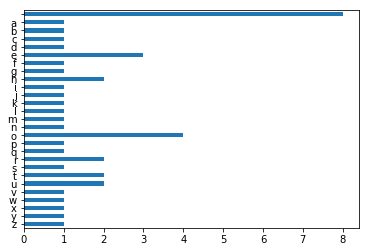

In [20]:
# We can use value counts to plot a summary of data as well. 

ser5.value_counts().sort_index(ascending=False).plot(kind="barh")

# The DataFrame data structure

DataFrames can be thought of as aggregates of series. They are tabular data structures. 

In [28]:
# One dimensional data frame with no indices or column labels 
df1 = DataFrame([1,2,3,4,5])
print(df1,"\n")

# Two dimensional data frame with no indices or column labels. 
# Note each 'inner list' in the list is treated as a row. this is why they will come out horizontal.
df2 = DataFrame([[1,2,3,4,5],[2,5,10,17,26]])
print(df2,"\n")

# Here we can see a data frame of rows
# Notice how PANDAS handles the missing value
df3 = DataFrame([[1,2],[2,5],[3,10],[NaN,4],[5,26]])
print(df3,"\n")

# Let's replace the index for this data frame
df3.index = ["first","second","third","fourth","fifth"]
print(df3,"\n")

# Let's replace the column labels.
df3.columns = ["number","sq_plus_1"]
print(df3,"\n")



   0
0  1
1  2
2  3
3  4
4  5 

   0  1   2   3   4
0  1  2   3   4   5
1  2  5  10  17  26 

     0   1
0  1.0   2
1  2.0   5
2  3.0  10
3  NaN   4
4  5.0  26 

          0   1
first   1.0   2
second  2.0   5
third   3.0  10
fourth  NaN   4
fifth   5.0  26 

        number  sq_plus_1
first      1.0          2
second     2.0          5
third      3.0         10
fourth     NaN          4
fifth      5.0         26 



In [31]:
df3.sort_values("number",ascending=True,inplace=True)

print(df3)

sortedSQplus1 = df3.sort_values("sq_plus_1",ascending=False)

print(sortedSQplus1)

        number  sq_plus_1
first      1.0          2
second     2.0          5
third      3.0         10
fifth      5.0         26
fourth     NaN          4
        number  sq_plus_1
fifth      5.0         26
third      3.0         10
second     2.0          5
fourth     NaN          4
first      1.0          2


In [32]:
# Getting Data in a Data Frame 

df_pol = DataFrame.from_csv("WD18_PolCandidates.csv")
df_pol.head(3)

# Basic - look what happened! 
# Name is in its own row, the names are now indices.
# We want to tell the parser that we want to keep names not as an index.

,id,party,constituency,twitter_username,facebook_page_url,party_ppc_page_url,gender
name,,,,,,,
Captain Beany,20,Independent,Aberavon,captainbeany,https://www.facebook.com/VoteCaptainBeany,NaN,male
Peter Bush,6754,UK Independence Party (UKIP),Aberavon,NaN,https://www.facebook.com/peterbushukip,NaN,male
Helen Ceri Clarke,4561,Liberal Democrats,Aberavon,NaN,NaN,http://www.libdems.org.uk/helen_ceri_clarke,female


In [33]:
import os
print(os.getcwd())

/Users/bernie/Documents/Teaching/WD2018/week01


In [34]:
# This should work just fine.
df_pol = DataFrame.from_csv("WD18_PolCandidates.csv",index_col=None)
# df.head() just prints the first n rows (5 by default)
df_pol.head()
# Okay, that's much better. 

,name,id,party,constituency,twitter_username,facebook_page_url,party_ppc_page_url,gender
0,Captain Beany,20,Independent,Aberavon,captainbeany,https://www.facebook.com/VoteCaptainBeany,NaN,male
1,Peter Bush,6754,UK Independence Party (UKIP),Aberavon,NaN,https://www.facebook.com/peterbushukip,NaN,male
2,Helen Ceri Clarke,4561,Liberal Democrats,Aberavon,NaN,NaN,http://www.libdems.org.uk/helen_ceri_clarke,female
3,Edward Yi He,5518,Conservative Party,Aberavon,edward4aberavon,https://www.facebook.com/Edward4Aberavon,https://www.conservatives.com/OurTeam/Prospect...,male
4,Owen Herbert,6520,Trade Unionist and Socialist Coalition,Aberavon,NaN,https://www.facebook.com/tuscowenherbert,http://tusc2015.com/owen-herbert-for-aberavon2/,male


In [38]:
df_pol[(df_pol["party"] == "Labour Party") | (df_pol["constituency"] == "Aberavon")]

,name,id,party,constituency,twitter_username,facebook_page_url,party_ppc_page_url,gender
0,Captain Beany,20,Independent,Aberavon,captainbeany,https://www.facebook.com/VoteCaptainBeany,NaN,male
1,Peter Bush,6754,UK Independence Party (UKIP),Aberavon,NaN,https://www.facebook.com/peterbushukip,NaN,male
2,Helen Ceri Clarke,4561,Liberal Democrats,Aberavon,NaN,NaN,http://www.libdems.org.uk/helen_ceri_clarke,female
3,Edward Yi He,5518,Conservative Party,Aberavon,edward4aberavon,https://www.facebook.com/Edward4Aberavon,https://www.conservatives.com/OurTeam/Prospect...,male
4,Owen Herbert,6520,Trade Unionist and Socialist Coalition,Aberavon,NaN,https://www.facebook.com/tuscowenherbert,http://tusc2015.com/owen-herbert-for-aberavon2/,male
5,Duncan Higgitt,5576,Plaid Cymru - The Party of Wales,Aberavon,DuncanHiggitt,https://www.facebook.com/DuncanHiggittforAfan,http://www.partyofwales.org/duncan-higgitt/,male
6,Andrew Jordan,5754,Socialist Labour Party,Aberavon,andrewjordanslp,NaN,NaN,male
7,Stephen Kinnock,4252,Labour Party,Aberavon,SKinnock,NaN,http://www.labour.org.uk/people/detail/stephen...,male
8,Jonathan Tier,5328,Green Party,Aberavon,jonathantier,https://www.facebook.com/Jonathantiergreen2015,NaN,male
14,Mary Wimbury,4253,Labour Party,Aberconwy,MaryWimbury,NaN,http://www.labour.org.uk/people/detail/mary-wi...,female


In [67]:
# How many people tweet by party? 
# What is the ratio of people who tweet by party? 
# Report on only those parties with more than 10 people running for office.  

# Series 1. How many pepople per party. 
partyCount = df_pol["party"].value_counts()
print(partyCount.head(10))
# print()

# Series 2. How many people per party have a twitter account
haveTwitter = df_pol["twitter_username"].notnull()
# print(haveTwitter)
partyCountWithTwitter = df_pol[haveTwitter]["party"].value_counts()
# print(haveTwitter.head(5))
# thingsToDisplay = "party"

# thingsToDisplay2 = ["party","gender","name"]


# print(df_pol[haveTwitter][thingsToDisplay].value_counts())
display(partyCountWithTwitter)
# print(partyCountWithTwitter.head(10))



Liberal Democrats                         631
Conservative Party                        631
UK Independence Party (UKIP)              614
Labour Party                              589
Green Party                               542
Independent                               170
Trade Unionist and Socialist Coalition    128
Scottish National Party (SNP)              59
Labour and Co-operative Party              42
Plaid Cymru - The Party of Wales           40
Name: party, dtype: int64


Labour Party                                       545
Conservative Party                                 530
Liberal Democrats                                  440
Green Party                                        420
UK Independence Party (UKIP)                       310
Trade Unionist and Socialist Coalition              88
Independent                                         76
Scottish National Party (SNP)                       59
Labour and Co-operative Party                       42
Plaid Cymru - The Party of Wales                    33
Scottish Green Party                                27
English Democrats                                   19
Alliance - Alliance Party of Northern Ireland       17
Sinn Féin                                           14
Cannabis is Safer than Alcohol                      14
SDLP (Social Democratic & Labour Party)             12
National Health Action Party                        12
Conservative and Unionist Party                     12
Ulster Uni

In [64]:
# Creating a new DataFrame with these two series together
# Notice that .T means transpose. This is the simplest way to swap rows and columns.
# newarray = list(zip(list(partyCount),list(partyCountWithTwitter)))
# print(newarray)

# l1 = [1,2,3,4]
# l2 = [5,6,7,8]
# l3 = zip(l1,l2)
# print(list(l3))
df_parties = DataFrame([partyCount,partyCountWithTwitter],index=["Party Count","Have Twitter"])
df_parties
df_parties.T

,Party Count,Have Twitter
Al-Zebabist Nation of Ooog,1.0,1.0
All People's Party,4.0,3.0
Alliance - Alliance Party of Northern Ireland,18.0,17.0
Alliance For Green Socialism,4.0,NaN
Alter Change - Politics. Only Different,1.0,1.0
Animal Welfare Party,4.0,2.0
Apni Party,1.0,NaN
Apolitical Democrats,1.0,1.0
"Beer, Baccy and Scratchings",1.0,1.0
Bournemouth Independent Alliance,1.0,1.0


# We want to transpose! 

Transposition in linear algebra is taking the rows and making them the columns (and vice versa)

so: 
~~~
a b c d
e f g h
~~~
becomes:
~~~
a e
b f
c g
d h
~~~

To do this in a DataFrame we would just add .T at the end. 

print(DataFrame.T) will print a transposed DataFrame

DataFrame = DataFrame.T will make the dataframe permanently transposed. 

In [65]:
df_parties = df_parties.T
print(df_parties.head())

                                               Party Count  Have Twitter
Al-Zebabist Nation of Ooog                             1.0           1.0
All People's Party                                     4.0           3.0
Alliance - Alliance Party of Northern Ireland         18.0          17.0
Alliance For Green Socialism                           4.0           NaN
Alter Change - Politics. Only Different                1.0           1.0


In [73]:
# Creating a new variable that is the result of two other variables. 
df_parties["proportion"] =  df_parties["Have Twitter"] / df_parties["Party Count"]

df_parties.sort_values("proportion",inplace=True,ascending=True)

# We could just print it, but it looks nicer to use the HTML. 
# Compare: 

display(df_parties[df_parties["Party Count"] >= 10])

# pd.options.display.float_format = '{}'.format
# You can use this code to change the display format per table. 
# Unfortunately, it doesn't work per column. You will have to seek elsewhere for that.
# pd.options.display.float_format = '{:.3f}'.format

# display(df_parties[df_parties["Party Count"] >= 10])

# for i in df_parties.index:
#     if i in ["National Front", "British National Party"]:
#         display(df_parties.loc[i])

,Party Count,Have Twitter,ratio,proportion
Christian Peoples Alliance,17.0,7.0,0.4117647058823529,0.4117647058823529
Cannabis is Safer than Alcohol,32.0,14.0,0.4375,0.4375
Official Monster Raving Loony Party,16.0,7.0,0.4375,0.4375
Independent,170.0,76.0,0.4470588235294118,0.4470588235294118
UK Independence Party (UKIP),614.0,310.0,0.504885993485342,0.504885993485342
English Democrats,32.0,19.0,0.59375,0.59375
Democratic Unionist Party - D.U.P.,16.0,10.0,0.625,0.625
SDLP (Social Democratic & Labour Party),18.0,12.0,0.6666666666666666,0.6666666666666666
Trade Unionist and Socialist Coalition,128.0,88.0,0.6875,0.6875
Liberal Democrats,631.0,440.0,0.6973058637083994,0.6973058637083994


In [74]:
# What about counts of a categorical, say, the percent of candidates who were women? 
# There are lots of ways to do this. I'm going to use a 'map' to map the gender on to a binary

# What's the gender column called? 
print(df_pol.columns)

Index(['name', 'id', 'party', 'constituency', 'twitter_username',
       'facebook_page_url', 'party_ppc_page_url', 'gender'],
      dtype='object')


In [77]:
# Okay, it's "gender". 
df_pol["gender"].value_counts(dropna=False)

male         2427
female        893
Male          504
Female        141
NaN             4
Man (sex)       1
Female          1
Name: gender, dtype: int64

In [78]:
# Uh oh, it seems that the gender was entered in a number of ways.
# What's up with Female there twice? 
# Let's check
print(df_pol["gender"].value_counts().index)

Index(['male', 'female', 'Male', 'Female', 'Man (sex)', 'Female '], dtype='object')


In [79]:
# A-ha! one has "Female " and one has "Female"
# Let's turn this into a binary variable 
mapper = {
    "male":0,
    "Male":0,
    "Man (sex)":0,
    "female":1,
    "Female":1,
    "Female ":1
}

df_pol["bgender"] = df_pol["gender"].map(mapper)
# male = df_pol["gender" == ""]
# partyCountWithTwitter = df_pol[haveTwitter]["party"].value_counts()
df_pol["bgender"].value_counts(dropna=False)

0.0    2932
1.0    1035
nan       4
Name: bgender, dtype: int64

In [80]:
# Okay, so we can see that 1035 were women and 2932 were men, 4 were undefined in the data.
# Are some parties more gender balanced than others?

# First lets 'group' the data
polGroup = df_pol.groupby("party")

# groupby creates a representation of the same data, not new data. 
# We can use this representation to create aggregates. 
# The [:10] just means give me the first ten. 
print(polGroup["bgender"].mean())

# Ok, so this looks coherent. Why don't we append this to our parties dataframe?
# That way we can sort in lots of ways, create new varibles for the data frame and more. 
df_parties["gender_ratio"] = polGroup["bgender"].mean()

# This will display the whole table sorted by Gender Ratio:
display(df_parties[df_parties["Party Count"] > 10].sort_values("gender_ratio",ascending=False))

# Notice in this one, we are only going to sort and display the gender_ratio series. 
# Do you understand the difference between this code and the code above? 
display(df_parties[df_parties["Party Count"] > 10]["gender_ratio"].sort_values(ascending=False))

party
Al-Zebabist Nation of Ooog                                             0.0
All People's Party                                                     0.0
Alliance - Alliance Party of Northern Ireland           0.3888888888888889
Alliance For Green Socialism                                           0.5
Alter Change - Politics. Only Different                                0.0
Animal Welfare Party                                                  0.25
Apni Party                                                             0.0
Apolitical Democrats                                                   0.0
Beer, Baccy and Scratchings                                            0.0
Bournemouth Independent Alliance                                       0.0
British Democratic Party                                               0.0
British Independents                                                   0.0
British National Party                                                 0.5
Campaign           

,Party Count,Have Twitter,ratio,proportion,gender_ratio
Scottish Green Party,31.0,27.0,0.8709677419354839,0.8709677419354839,0.41935483870967744
National Health Action Party,12.0,12.0,1.0,1.0,0.4166666666666667
Alliance - Alliance Party of Northern Ireland,18.0,17.0,0.9444444444444444,0.9444444444444444,0.3888888888888889
Labour and Co-operative Party,42.0,42.0,1.0,1.0,0.38095238095238093
Green Party,542.0,420.0,0.7749077490774908,0.7749077490774908,0.3763837638376384
Conservative and Unionist Party,16.0,12.0,0.75,0.75,0.375
Scottish National Party (SNP),59.0,59.0,1.0,1.0,0.3559322033898305
Labour Party,589.0,545.0,0.9252971137521222,0.9252971137521222,0.3361629881154499
Sinn Féin,18.0,14.0,0.7777777777777778,0.7777777777777778,0.3333333333333333
Christian Peoples Alliance,17.0,7.0,0.4117647058823529,0.4117647058823529,0.29411764705882354


Scottish Green Party                            0.41935483870967744
National Health Action Party                     0.4166666666666667
Alliance - Alliance Party of Northern Ireland    0.3888888888888889
Labour and Co-operative Party                   0.38095238095238093
Green Party                                      0.3763837638376384
Conservative and Unionist Party                               0.375
Scottish National Party (SNP)                    0.3559322033898305
Labour Party                                     0.3361629881154499
Sinn Féin                                        0.3333333333333333
Christian Peoples Alliance                      0.29411764705882354
SDLP (Social Democratic & Labour Party)          0.2777777777777778
Trade Unionist and Socialist Coalition                    0.2734375
Liberal Democrats                                0.2650793650793651
Conservative Party                               0.2583201267828843
Plaid Cymru - The Party of Wales                

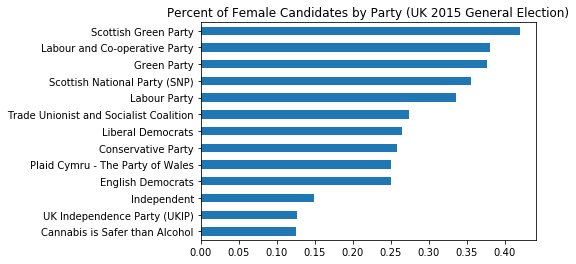

In [81]:
plot_title = "Percent of Female Candidates by Party (UK 2015 General Election)"
df_parties[df_parties["Party Count"] > 20]["gender_ratio"].sort_values(ascending=True).plot(kind="barh",title=plot_title)

In [ ]:
#### Optional note for LaTeX users! ####
#
# We can format these things for LaTeX as well. 
# Remember the last query we did - just add .to_latex() at the end
print(df_parties[df_parties["Party Count"] > 10].sort_values("gender_ratio",ascending=False).to_latex())



# Data Types for input / output

As a prelude to next week, I'm now introducing a number of different file formats. We will look at these next week, how to get them into and out of Python. 

- json
- xml
- sql
- csv
- Mircosoft Excel (xls and xlsx)
- serialization

## JSON (JavaScript Object Notation)

JavaScript Object Notation is a very lightweight format for downloading and storing data from the web. Many APIs use JSON for their file interchange. Considered in terms of python, it is basically just a series of unicode lists and dictionaries. 

## XML (eXtensible Markup Language) 

XML is a language for marking up data. Like other 'ML's such as as HTML, there is a header and a body. The header defines many things about the data, and then the body uses tags to signify the data and some properties about it. XML is very verbose as every piece of data is tagged in some way. 

## SQL (Structured Query Language)

SQL is the standard language for querying relational databases (where data is stored in linked tables). Later, we will look at a little bit of data in an SQLite database. That is a data structure that is useful for manging large amounts of data, although more of this will be covered in the Big Data Analytics class. 

# CSV (Comma Separated Values)

Comma-separated values are a traditional way to encode data. It works very simply by using return characters to denote rows and the commas to denote columns. It is possible to read data into Python as a CSV the hard way, but by using the _csv_ package it is possible to import a lot of data programmatically.

# Serialization - Pickling your data

In most langauges there's a way to take a data structure as is and simply write it to a file so that when the file is read it will load the data right up the way it started. Next week we will be pickling and unpickling files. 
